In [1]:
from deep_snow.application import predict_sd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set up arguments 
aoi = {'minlon':-108.1239, 'minlat':37.6393, 'maxlon':-107.5878, 'maxlat':38.0641}
target_date = '20240320'
snowoff_date = '20230910'
model_path = '../../weights/quinn_ResDepth_v3'
out_dir = '../../data/application'

In [3]:
ds = predict_sd(aoi=aoi, target_date=target_date, snowoff_date=snowoff_date, model_path=model_path, out_dir=out_dir)

searching for Sentinel-1 snow-on data
Returned 5 acquisitions
searching for Sentinel-1 snow-off data
Returned 5 acquisitions


/srv/conda/envs/notebook/lib/python3.11/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


searching for Sentinel-2 snow-on data
Returned 1 acquisitions
searching for COP30 dem data
downloading fractional forest cover data
file already exists, skipping
combining datasets
writing input data
finished preparing dataset!
reading input data
loading model


Text(0.5, 1.0, 'gaps in input data')

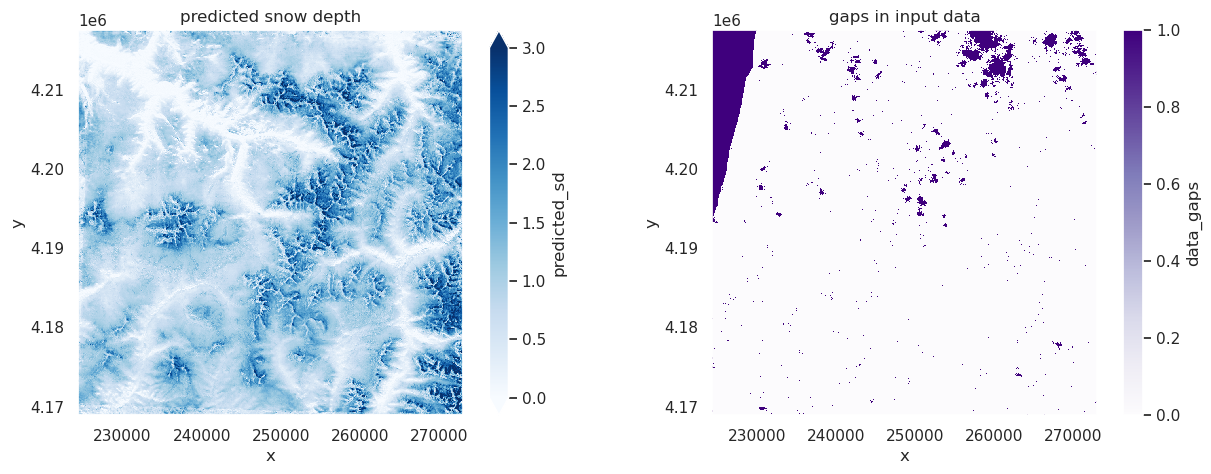

In [4]:
sns.set_theme()
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ds.predicted_sd.plot(ax=ax[0], cmap='Blues', vmin=0, vmax=3)
ax[0].set_aspect('equal')
ax[0].set_title('predicted snow depth')

ds.data_gaps.plot(ax=ax[1], cmap='Purples')
ax[1].set_aspect('equal')
ax[1].set_title('gaps in input data')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


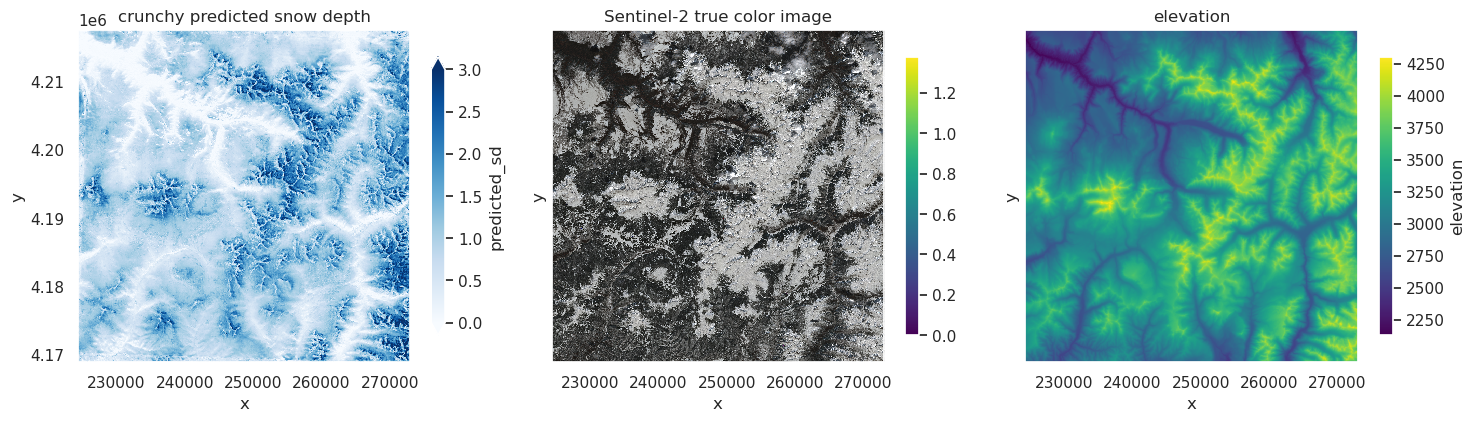

In [5]:
f, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ds.predicted_sd.plot(ax=ax[0], cmap='Blues', vmin=0, vmax=3, cbar_kwargs={'shrink':0.6})
ax[0].set_title('deep predicted snow depth')

rgb = ds[['B04', 'B03', 'B02']].to_array(dim='band')
rgb = rgb.rename('reflectance')
rgb = rgb/15000
im1 = rgb.plot.imshow(ax=ax[1])
ax[1].set_title('Sentinel-2 true color image')
cbar = f.colorbar(im1, ax=ax[1], shrink=0.6)

ds.elevation.plot(ax=ax[2], cbar_kwargs={'shrink':0.6})
ax[2].set_title('elevation')

for a in ax.flat:
    a.set_aspect('equal')
    a.grid(False)

f.tight_layout()

In [1]:
from deep_snow.application import predict_sd_ts

In [4]:
ds = predict_sd_ts(aoi=aoi, target_date=target_date, snowoff_date=snowoff_date, model_path=model_path, out_dir=out_dir)

--------------------------------------
working on 20240320, 1/17
searching for Sentinel-1 snow-on data
Returned 5 acquisitions
searching for Sentinel-1 snow-off data
Returned 5 acquisitions
searching for Sentinel-2 snow-on data
Returned 1 acquisitions


/srv/conda/envs/notebook/lib/python3.11/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


searching for COP30 dem data
downloading fractional forest cover data
file already exists, skipping
combining datasets
writing input data
finished preparing dataset!
reading input data
loading model
--------------------------------------
working on 20240308, 2/17
searching for Sentinel-1 snow-on data
Returned 5 acquisitions
searching for Sentinel-1 snow-off data
Returned 5 acquisitions
searching for Sentinel-2 snow-on data
Returned 1 acquisitions
searching for COP30 dem data
downloading fractional forest cover data
file already exists, skipping
combining datasets
writing input data
finished preparing dataset!
reading input data
loading model
--------------------------------------
working on 20240225, 3/17
searching for Sentinel-1 snow-on data
Returned 5 acquisitions
searching for Sentinel-1 snow-off data
Returned 5 acquisitions
searching for Sentinel-2 snow-on data
Returned 4 acquisitions
searching for COP30 dem data
downloading fractional forest cover data
file already exists, skippin